Problem 1

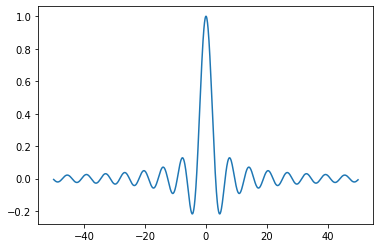

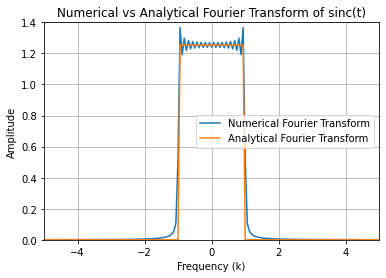

In [22]:
import numpy as np
import matplotlib.pyplot as plt


t_min = -50 
t_max = 50  
num_samples =1024  
delta_t = (t_max - t_min) / (num_samples-1)  
t = np.linspace(t_min, t_max, num_samples, endpoint=False)


f = np.zeros_like(t)
for i in range(len(t)):
    if t[i] == 0:
        f[i] = 1
    else:
        f[i] = np.sin(t[i]) / t[i]

plt.plot(t,f)
plt.show()


f_dft = np.fft.fft(f,norm='ortho')
k = (2*np.pi)*np.fft.fftfreq(num_samples, delta_t)  

F_continuous = delta_t * np.sqrt(num_samples / (2 * np.pi)) * np.exp(-1j * k * t_min) * f_dft

F_continuous =np.fft.fftshift(F_continuous)
k = np.fft.fftshift(k)


def box(f):
    return   np.where(np.abs(f) <= 1,np.pi*(1/np.sqrt(2*np.pi)), 0)

F_analytical = box(k)


plt.plot(k,  np.abs(F_continuous), label='Numerical Fourier Transform')
plt.plot(k, F_analytical, label='Analytical Fourier Transform')
plt.title('Numerical vs Analytical Fourier Transform of sinc(t)')
plt.xlabel('Frequency (k)')
plt.ylabel('Amplitude')
plt.xlim(-5, 5)  
plt.ylim(0,1.4) 
plt.legend()
plt.grid(True)
plt.show()

[-0.0052475  -0.01232164 -0.01762287 -0.02031216 -0.0199361  -0.01650238
 -0.01048602 -0.00276453  0.00550942  0.01307949  0.01877569  0.02169458
  0.02134168  0.0177141   0.01130943  0.00305857 -0.00580882 -0.0139468
 -0.02009658 -0.02328042 -0.02295604 -0.01910751 -0.0122575  -0.00339757
  0.00615439  0.01494921  0.02162529  0.02511827  0.02482952  0.02072686
  0.0133609   0.00379271 -0.00655772 -0.01612104 -0.02341514 -0.02727349
 -0.02703009 -0.02263209 -0.01466127 -0.00425921  0.00703467  0.01750929
  0.02553946  0.02983625  0.02965178  0.02490635  0.01621664  0.00481833
 -0.00760747 -0.01918013 -0.02810182 -0.03293439 -0.03282844 -0.02766853
 -0.01811025 -0.00550075  0.00830829  0.02122977  0.03125348  0.03675549
  0.03675739  0.0310947   0.02046603  0.00635234 -0.00918552 -0.02380367
 -0.03522442 -0.04158634 -0.04174209 -0.03545728 -0.02347691 -0.00744495
  0.01031544  0.02713269  0.04038218  0.04788855  0.04827451  0.04120129
  0.02746048  0.00889784 -0.01182574 -0.03160659 -0.

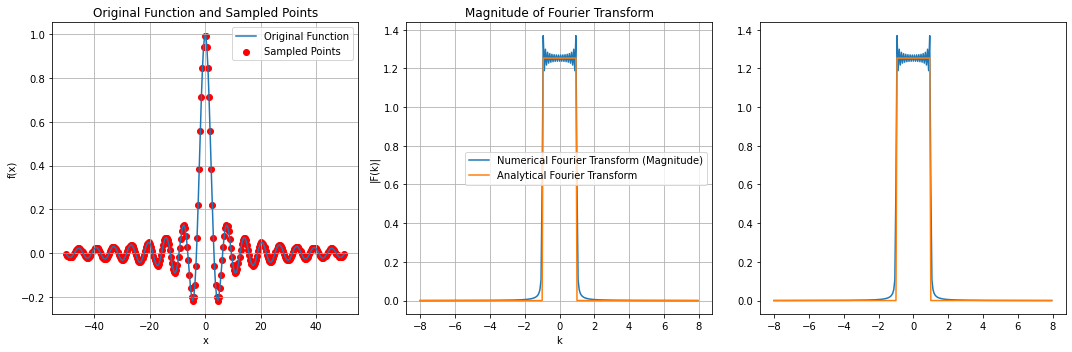

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where(x == 0, 1, np.sin(x) / x)

# Define parameters
xmin = -50
xmax = 50
n = 256

dx = (xmax - xmin) / (n - 1)

# Compute sample points and the function values at those points
xx = np.linspace(xmin, xmax, n)
sample_value = f(xx)

print(sample_value)
print(len(sample_value))
shift=np.fft.fftshift(sample_value)
print(np.fft.fftshift(sample_value))
print(len(shift))
# Compute the Fourier transform of the sample values
fft_sample = np.fft.fftshift(np.fft.fft(np.fft.fftshift(sample_value),norm='ortho'))
print(fft_sample)
fft1_sample = np.fft.fftshift(np.fft.fft((sample_value),norm='ortho'))
print(fft1_sample)
# Define the k-values for the Fourier transform
kk = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(n, dx))
print(kk)

k = (2*np.pi)*np.fft.fftfreq(n, dx)
k = np.fft.fftshift(k)
print(k)
# Compute the integral factor exp(-ikx_min)
int_fact = np.exp(-1j * kk * xmin)

# Compute the numerical Fourier transform with proper scaling
fft_numerical = fft_sample * dx*int_fact*(n/(2*np.pi))**0.5
fft1_numerical = fft1_sample * dx*int_fact*(n/(2*np.pi))**0.5
# Compute the analytical Fourier transform
# analytic fourier transfrom f(k)=(np.pi/2)*0.5  -1<=k=<1  otherwise 0
analytical_ft = np.where(np.abs(kk) <= 1, (np.pi/2)**0.5, 0)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(xx, f(xx), label='Original Function')
plt.scatter(xx, sample_value, label='Sampled Points', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Original Function and Sampled Points')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(kk, np.abs(fft_numerical), label='Numerical Fourier Transform (Magnitude)')
plt.plot(kk, analytical_ft, label="Analytical Fourier Transform")
plt.xlabel('k')
plt.ylabel('|F(k)|')
plt.title('Magnitude of Fourier Transform')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(k, np.abs(fft1_numerical), label='Numerical Fourier Transform (Magnitude)')
plt.plot(k, analytical_ft, label="Analytical Fourier Transform")
plt.tight_layout()
plt.show()